In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

import funciones_auxiliares_hito_2 as afx

warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('input/churn_train.csv').drop(columns='Unnamed: 0')

Analizando todas las variables numericas 



,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


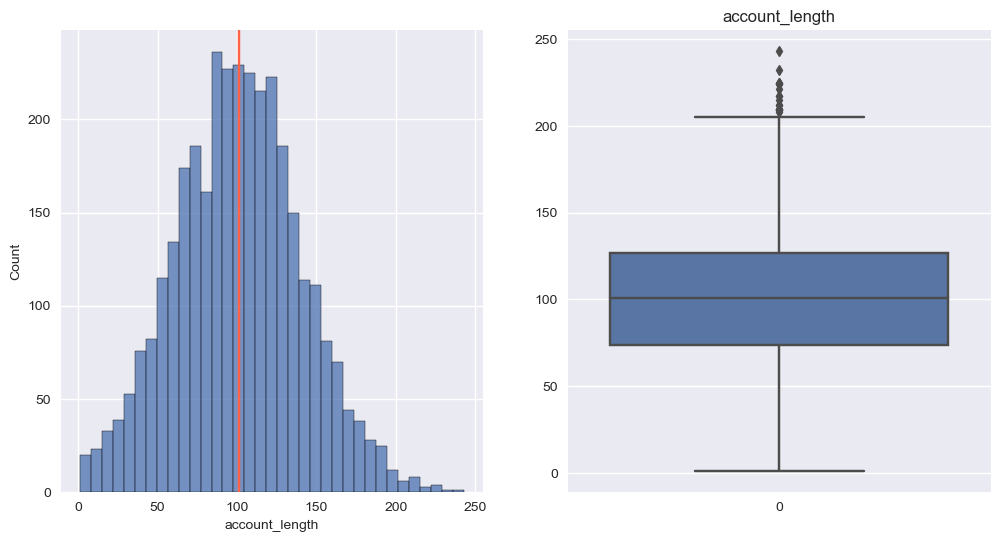

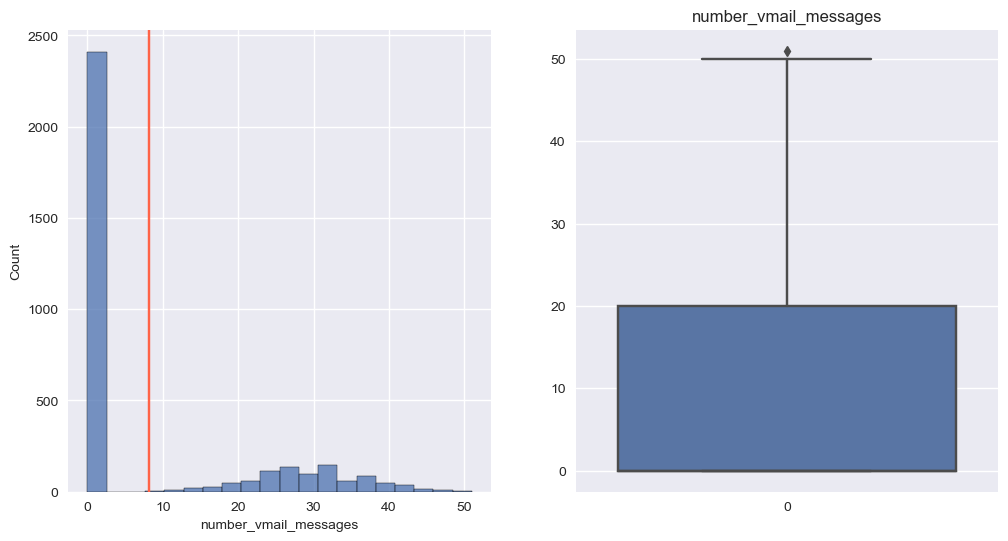

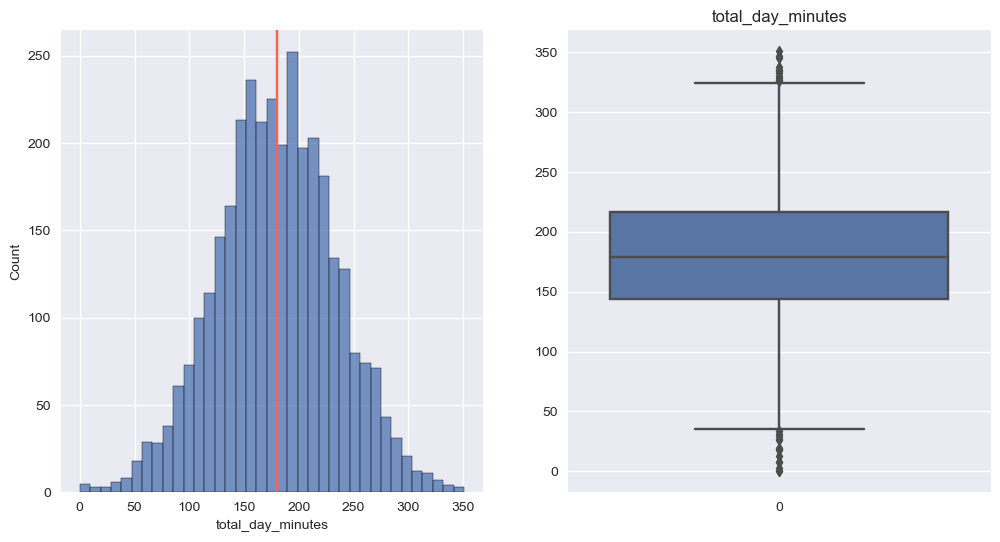

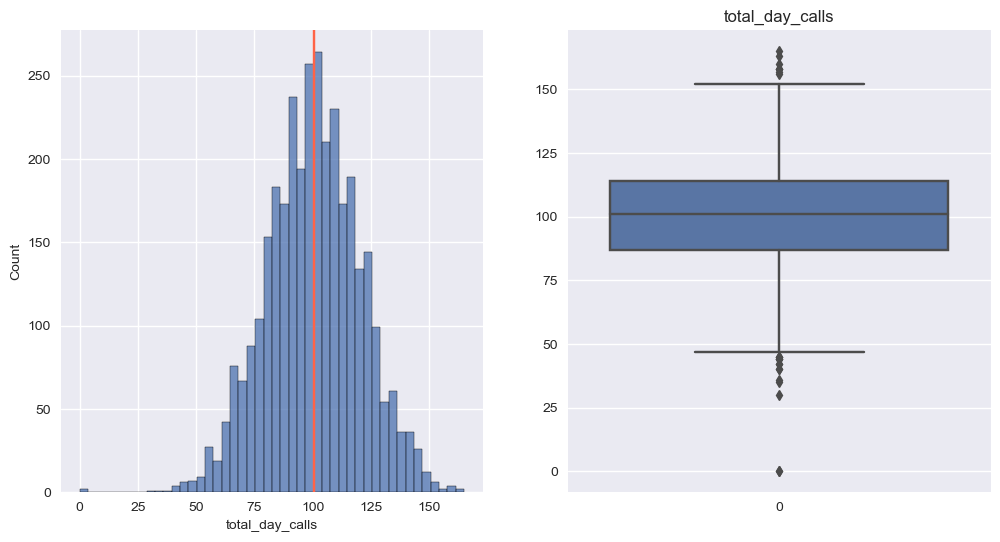

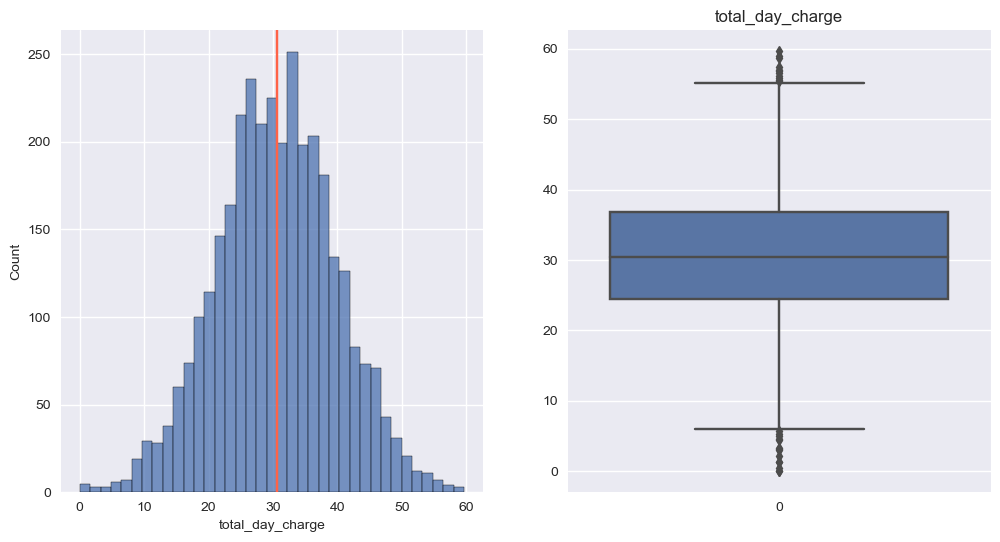

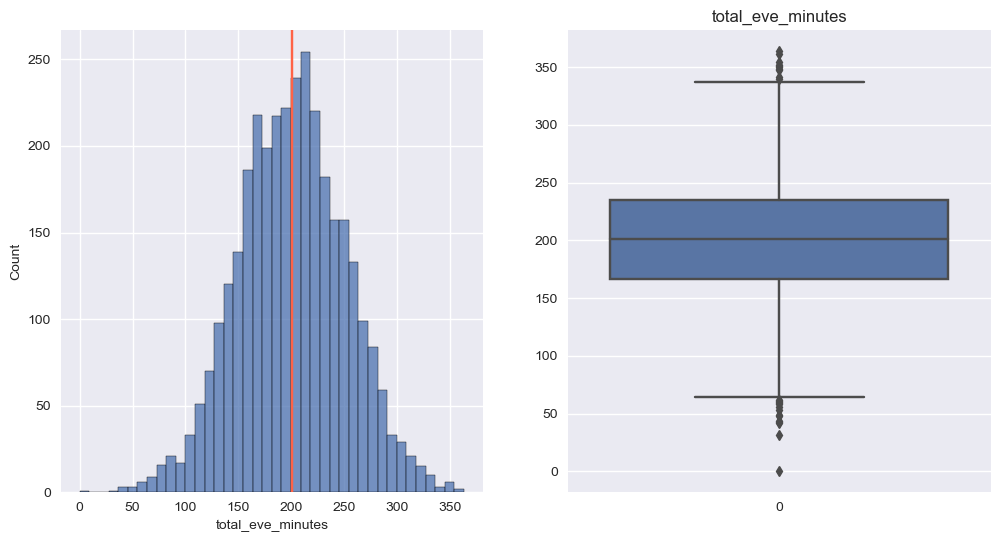

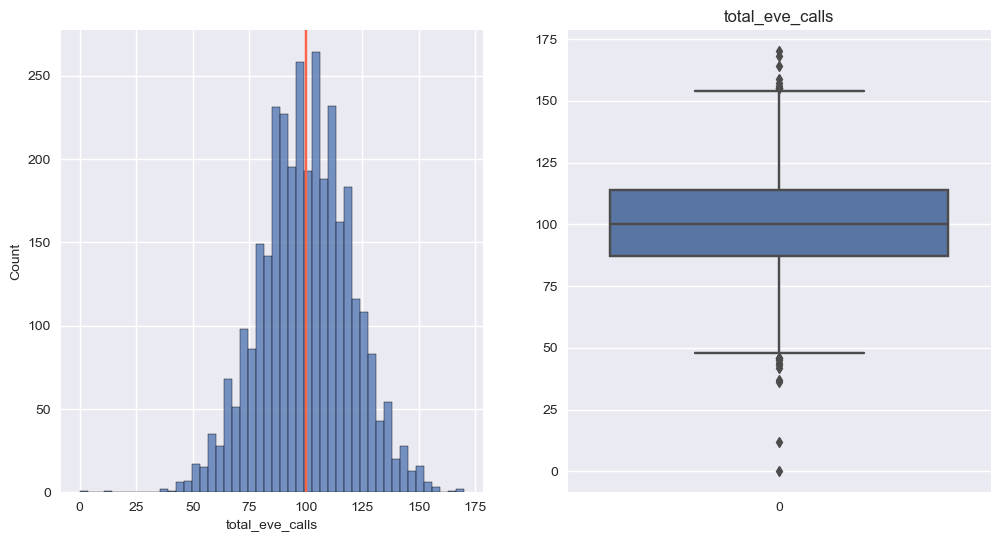

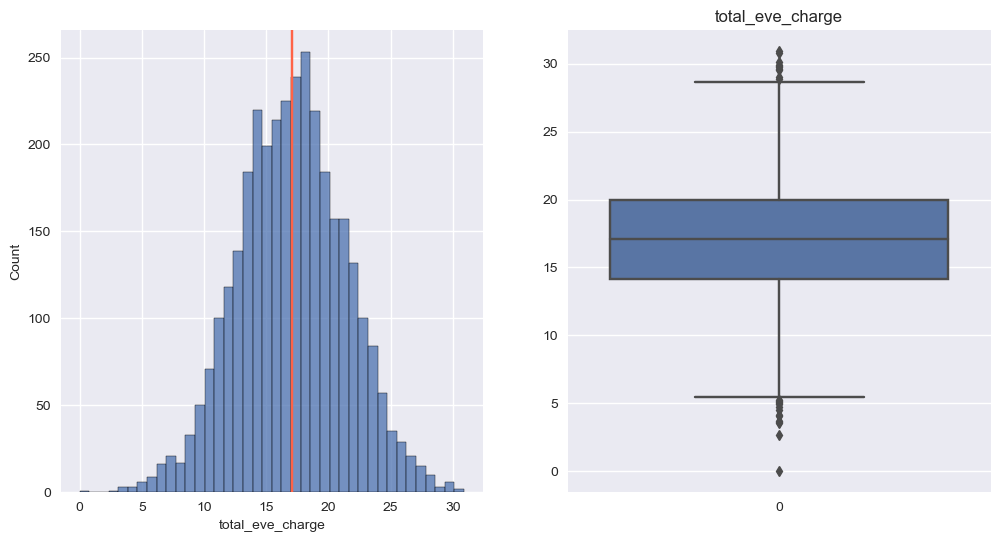

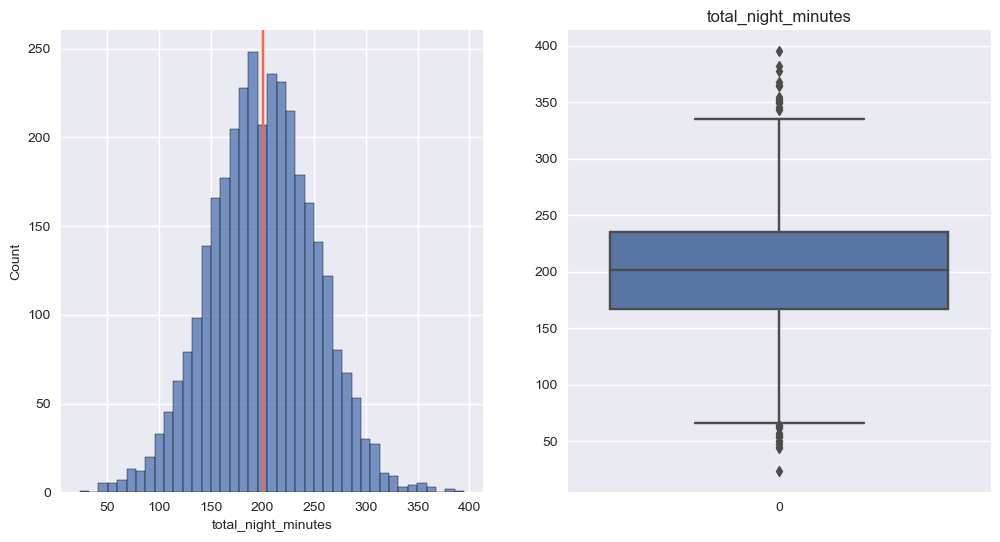

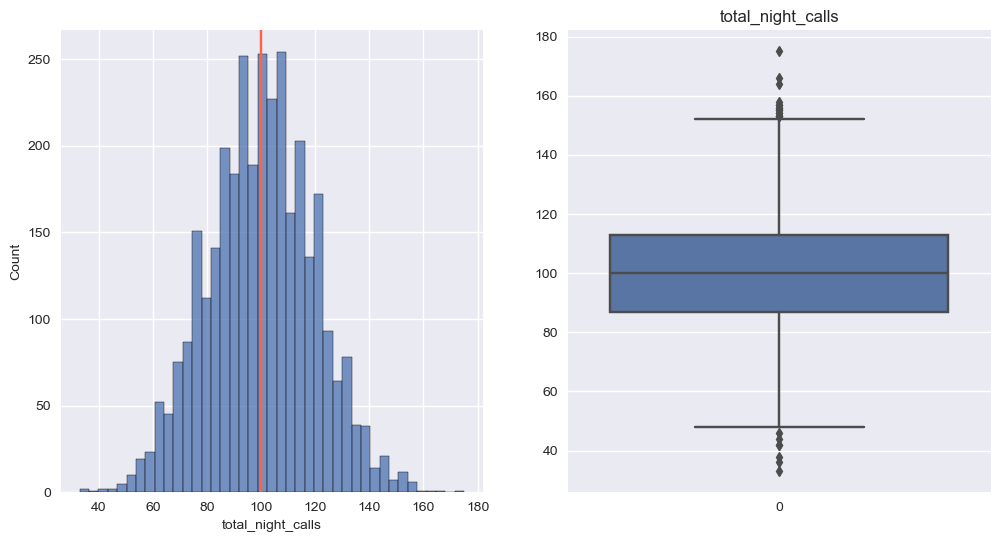

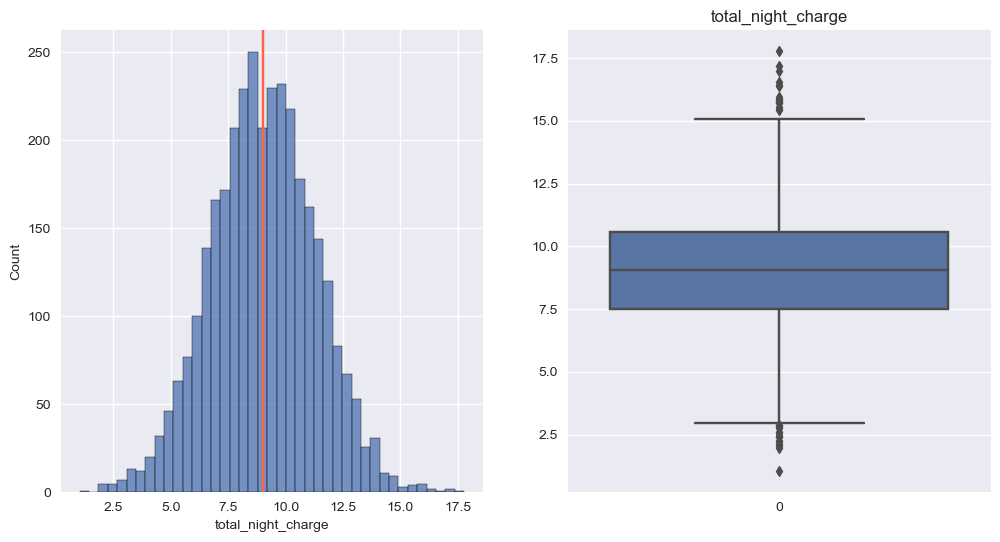

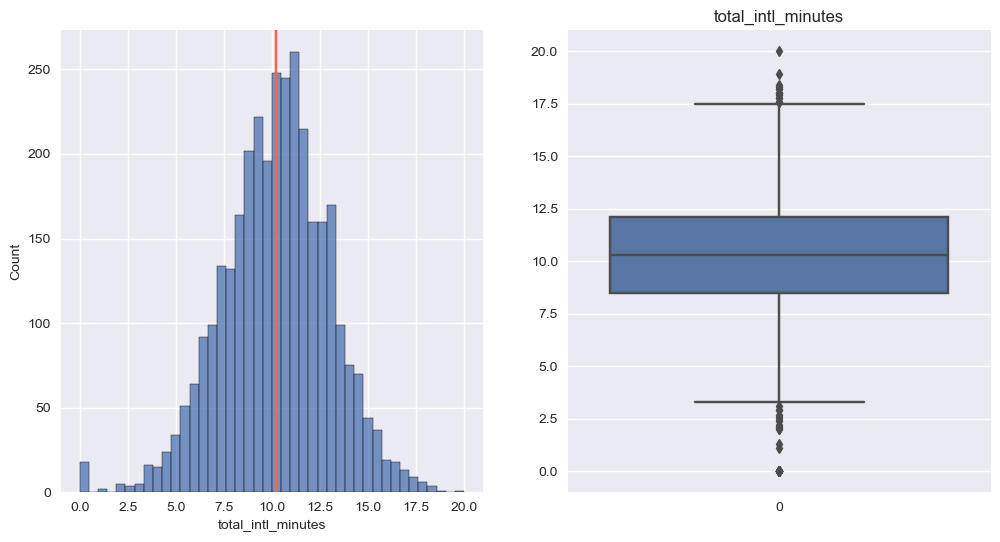

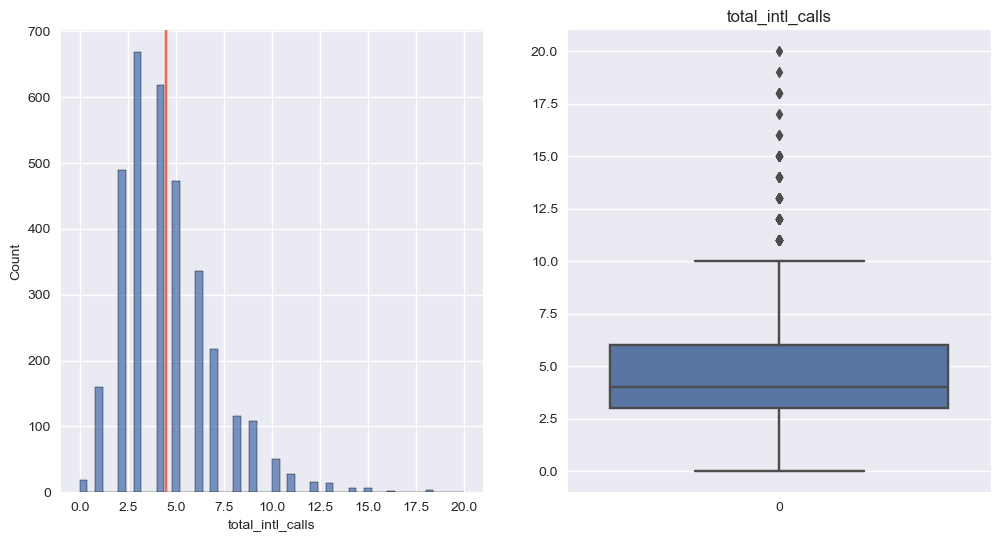

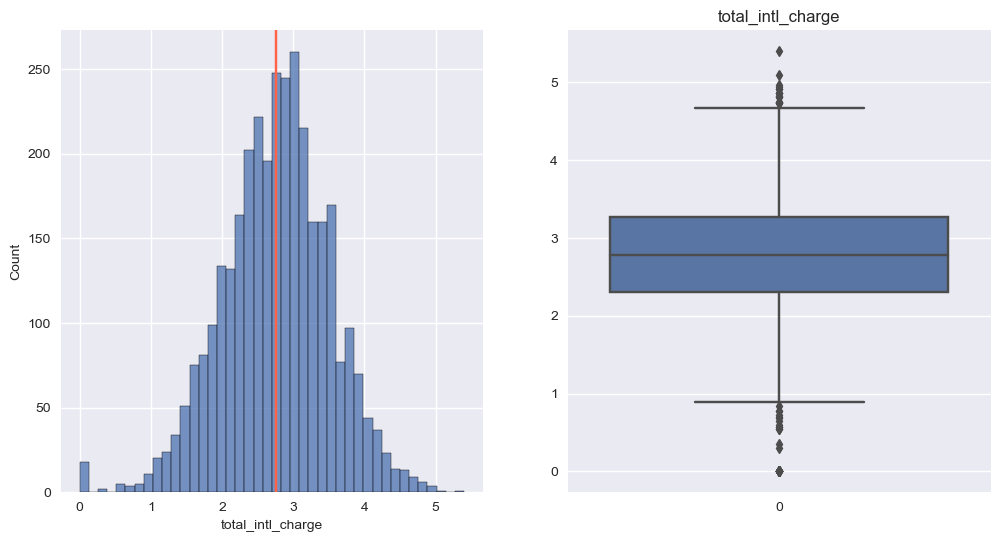

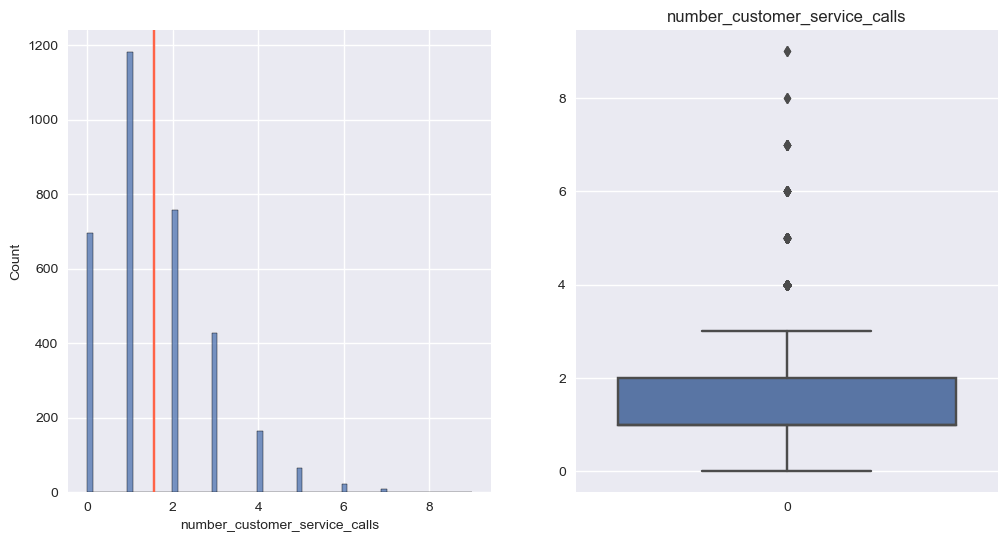

Analizando todas las variables categoricas 

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64


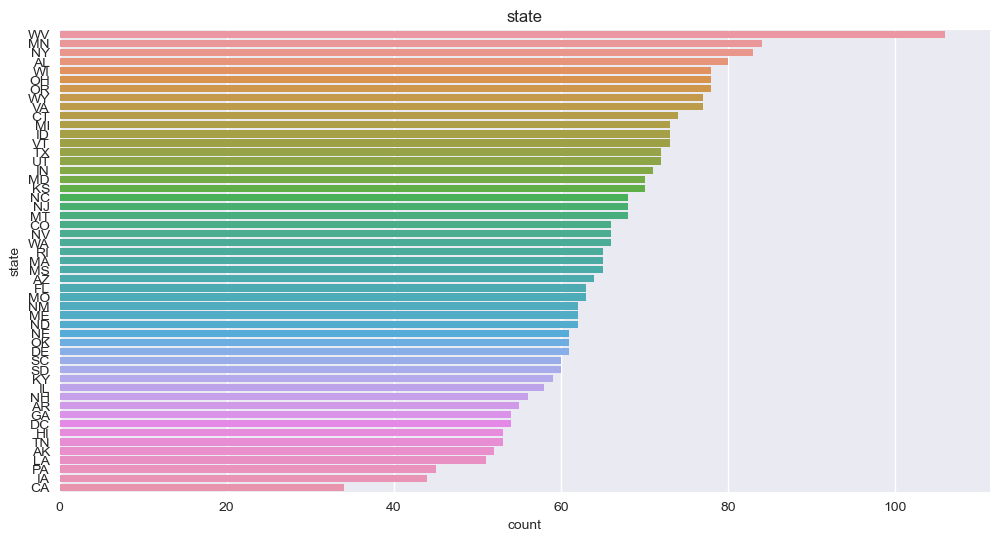

area_code
area_code_415    1655
area_code_510     840
area_code_408     838
Name: area_code, dtype: int64


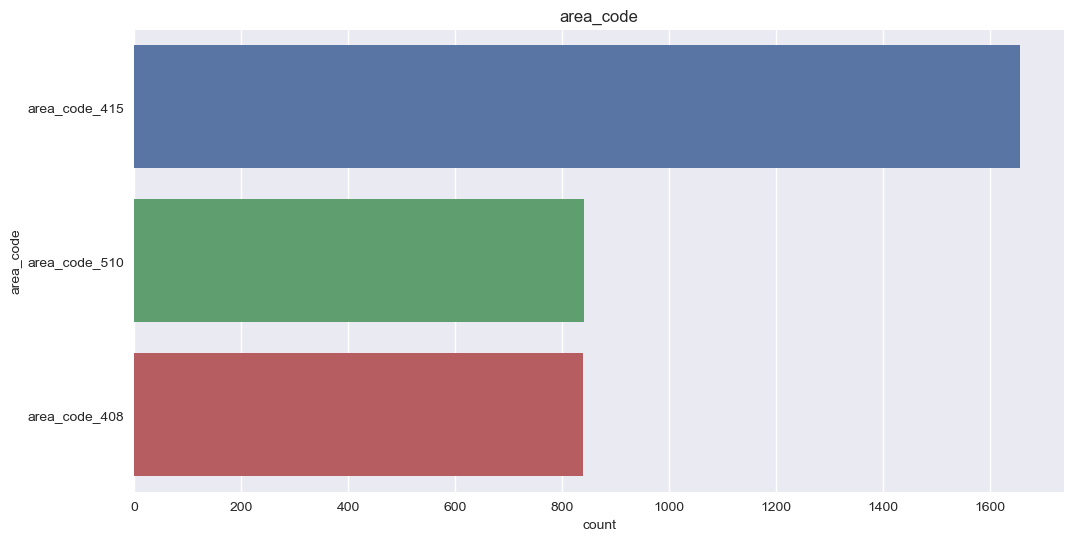

international_plan
no     3010
yes     323
Name: international_plan, dtype: int64


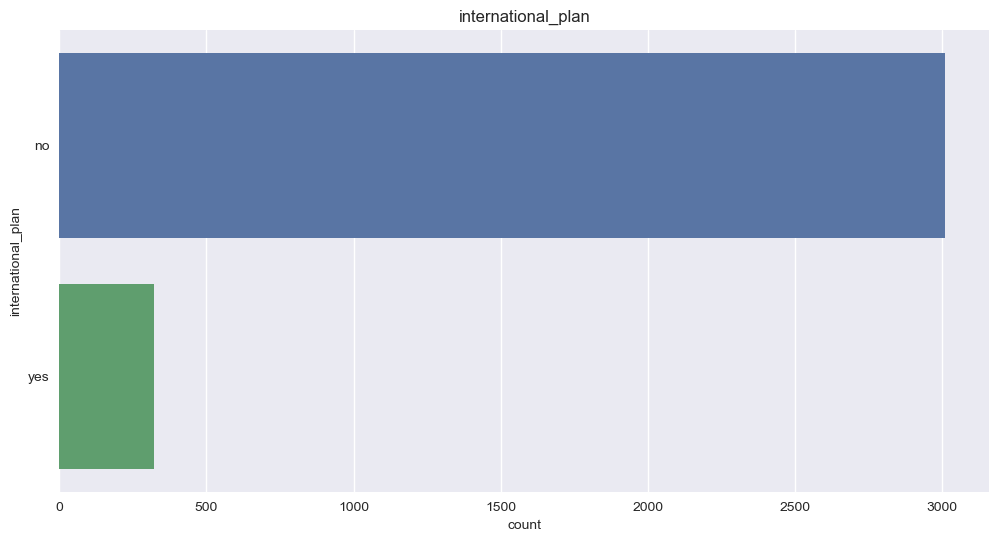

voice_mail_plan
no     2411
yes     922
Name: voice_mail_plan, dtype: int64


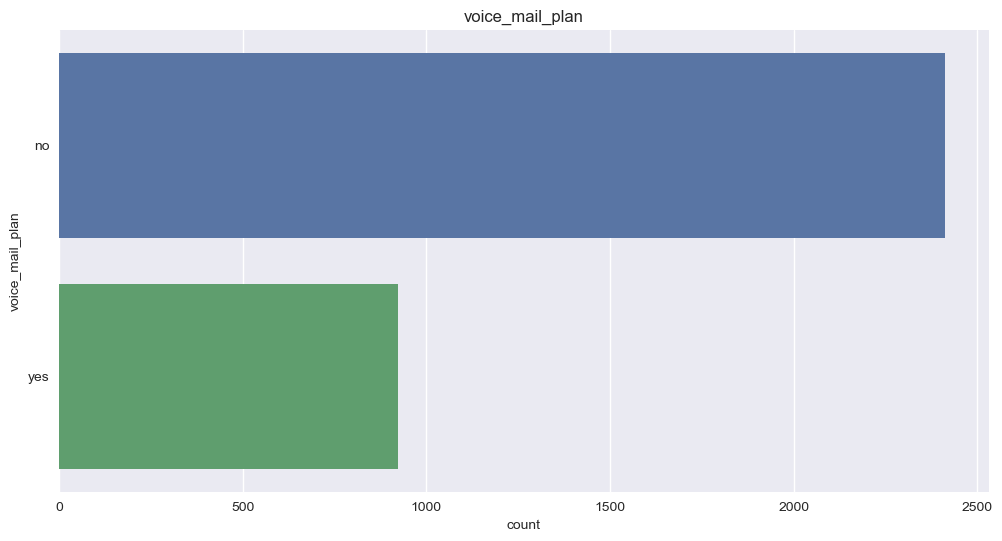

churn
no     2850
yes     483
Name: churn, dtype: int64


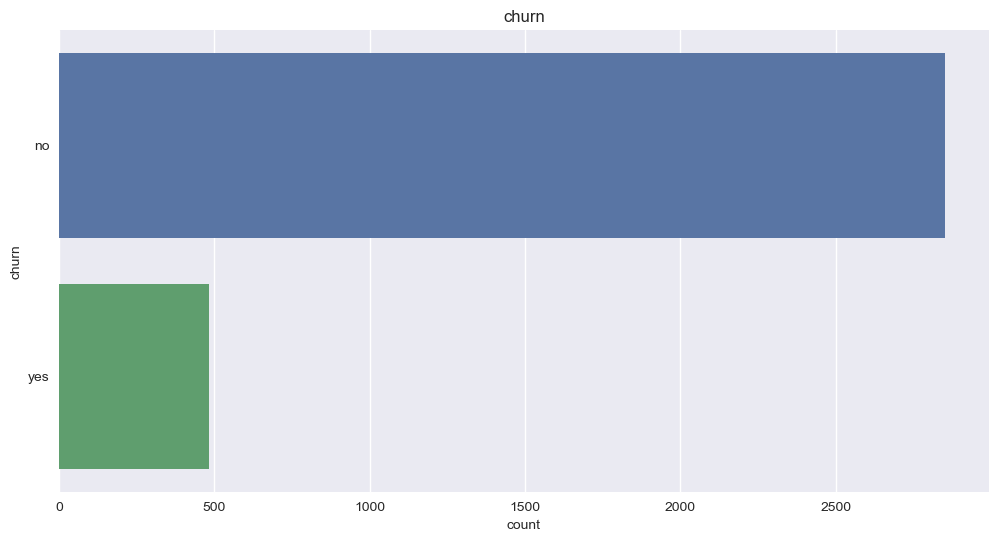

,cantidad_na,porcentaje_na
state,0,0.0
account_length,0,0.0
area_code,0,0.0
international_plan,0,0.0
voice_mail_plan,0,0.0
number_vmail_messages,0,0.0
total_day_minutes,0,0.0
total_day_calls,0,0.0
total_day_charge,0,0.0
total_eve_minutes,0,0.0


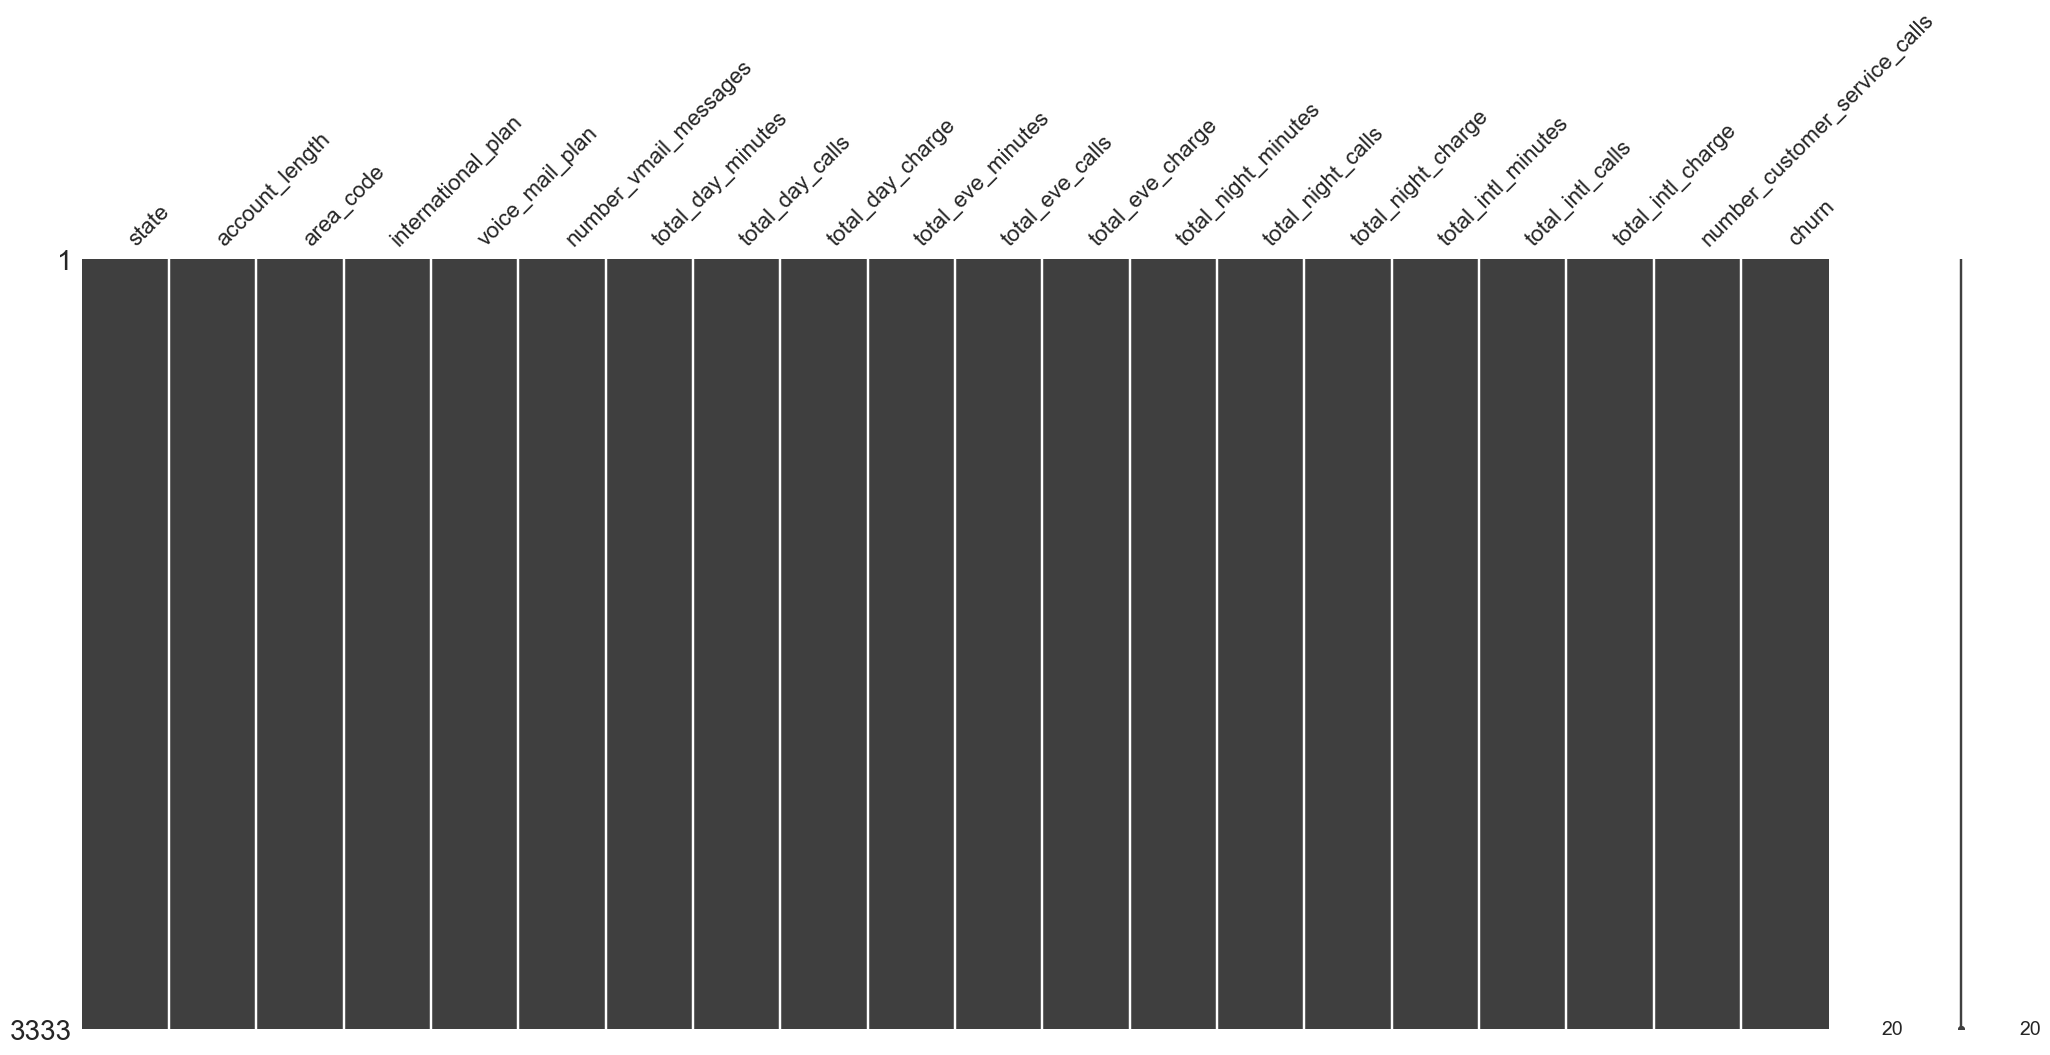

In [3]:
afx.analizar_variables_indpendientes(df)

- Al analizar las variables numericas se encontraron los siguientes comportamientos:

    - ```account_length```, ```total_day_minutes```, ```total_day_calls```,  ```total_day_charge```, ```total_eve_minutes```, ```total_eve_calls```, ```total_eve_charge```, ```total_night_minutes```,
    ```total_night_calls```, ```total_night_charge```, ```total_inti_minutes``` y ```total_inti_charge``` presentan distribuciones altamente normales. Por lo tanto, estas variables se dejaran en el dataset sin modificar.

    - ```number_vmail_messages```, ```total_inti_calls```, ```number_customer_service_calls``` presentan distribuciones sesgadas a valores bajos. Debido a lo anterior, seran transformadas con la escala logaritmica. Para hacer una transformacion correcta, es necesario trasnformar los datos para que esten en una escala > 0. number_vmail tiene un valor minimo de 0, total_intl_calls tiene un valor minimo de 0, number_customer_service_calls tiene un valor minimo de 0. Por lo tanto, a cada columna se le agregara 1 y luego se aplicara la escala logaritmica.

    - ```state```, ```area_code```,  ```international_plan```, ```voice_mail_plan``` corresponden a variables categoricas (binarias, y de mas de una categoria). Debido a lo anterior, seran codificadas con el metodo de One Hot Encoding.

    - La variable ```churn``` corresponde al vector objetivo del ejercicio. Es una variable categorica binaria (yes y no). Sera codificada de la siguiente forma: No -> 0, Yes -> 1. La variable tiene un alto sesgo hacia los valores no (2850 no contra 483 yes). Por lo tanto, es esperable que el modelo presente un mayor sesgo a predecir clientes que no tienen un rotacion en las companias de telecomunaciones.

    - La base de datos carece de algun valor faltante.

In [10]:
df_codificada = df.copy()

Analizando todas las variables numericas 



,number_vmail_messages,total_intl_calls,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000
mean,0.933677,1.606092,0.811017
std,1.517099,0.440954,0.519726
min,0.000000,0.000000,0.000000
25%,0.000000,1.386294,0.693147
50%,0.000000,1.609438,0.693147
75%,3.044522,1.945910,1.098612
max,3.951244,3.044522,2.302585


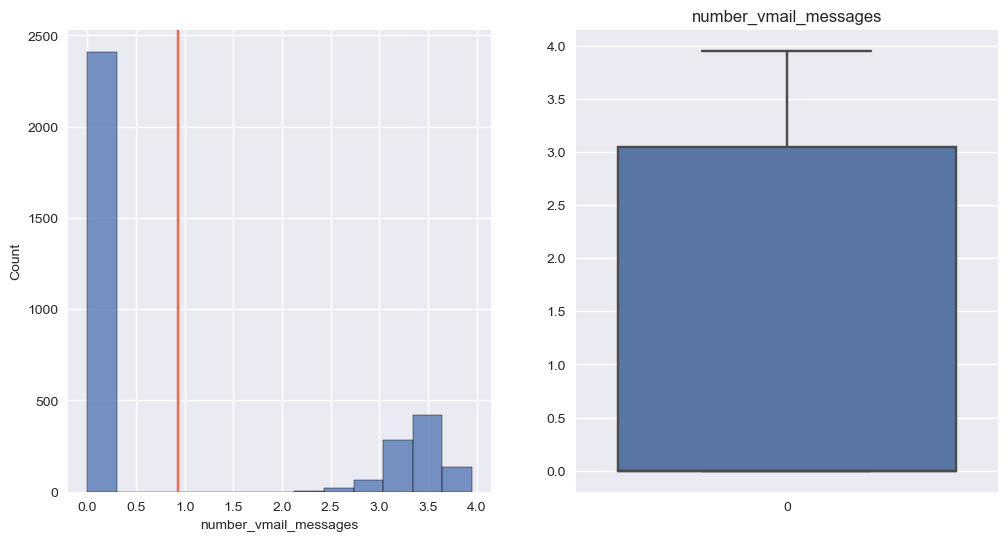

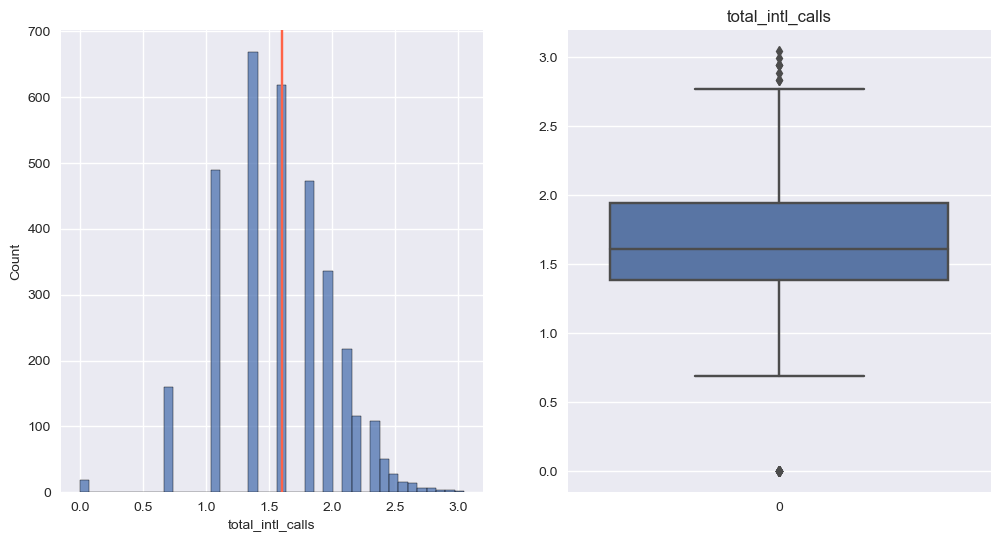

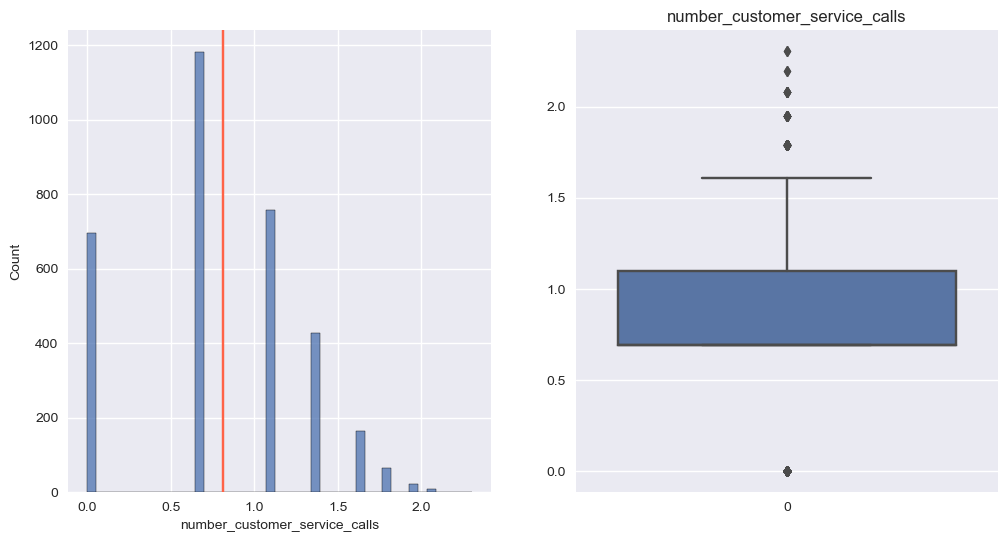

Analizando todas las variables categoricas 



,cantidad_na,porcentaje_na
number_vmail_messages,0,0.0
total_intl_calls,0,0.0
number_customer_service_calls,0,0.0


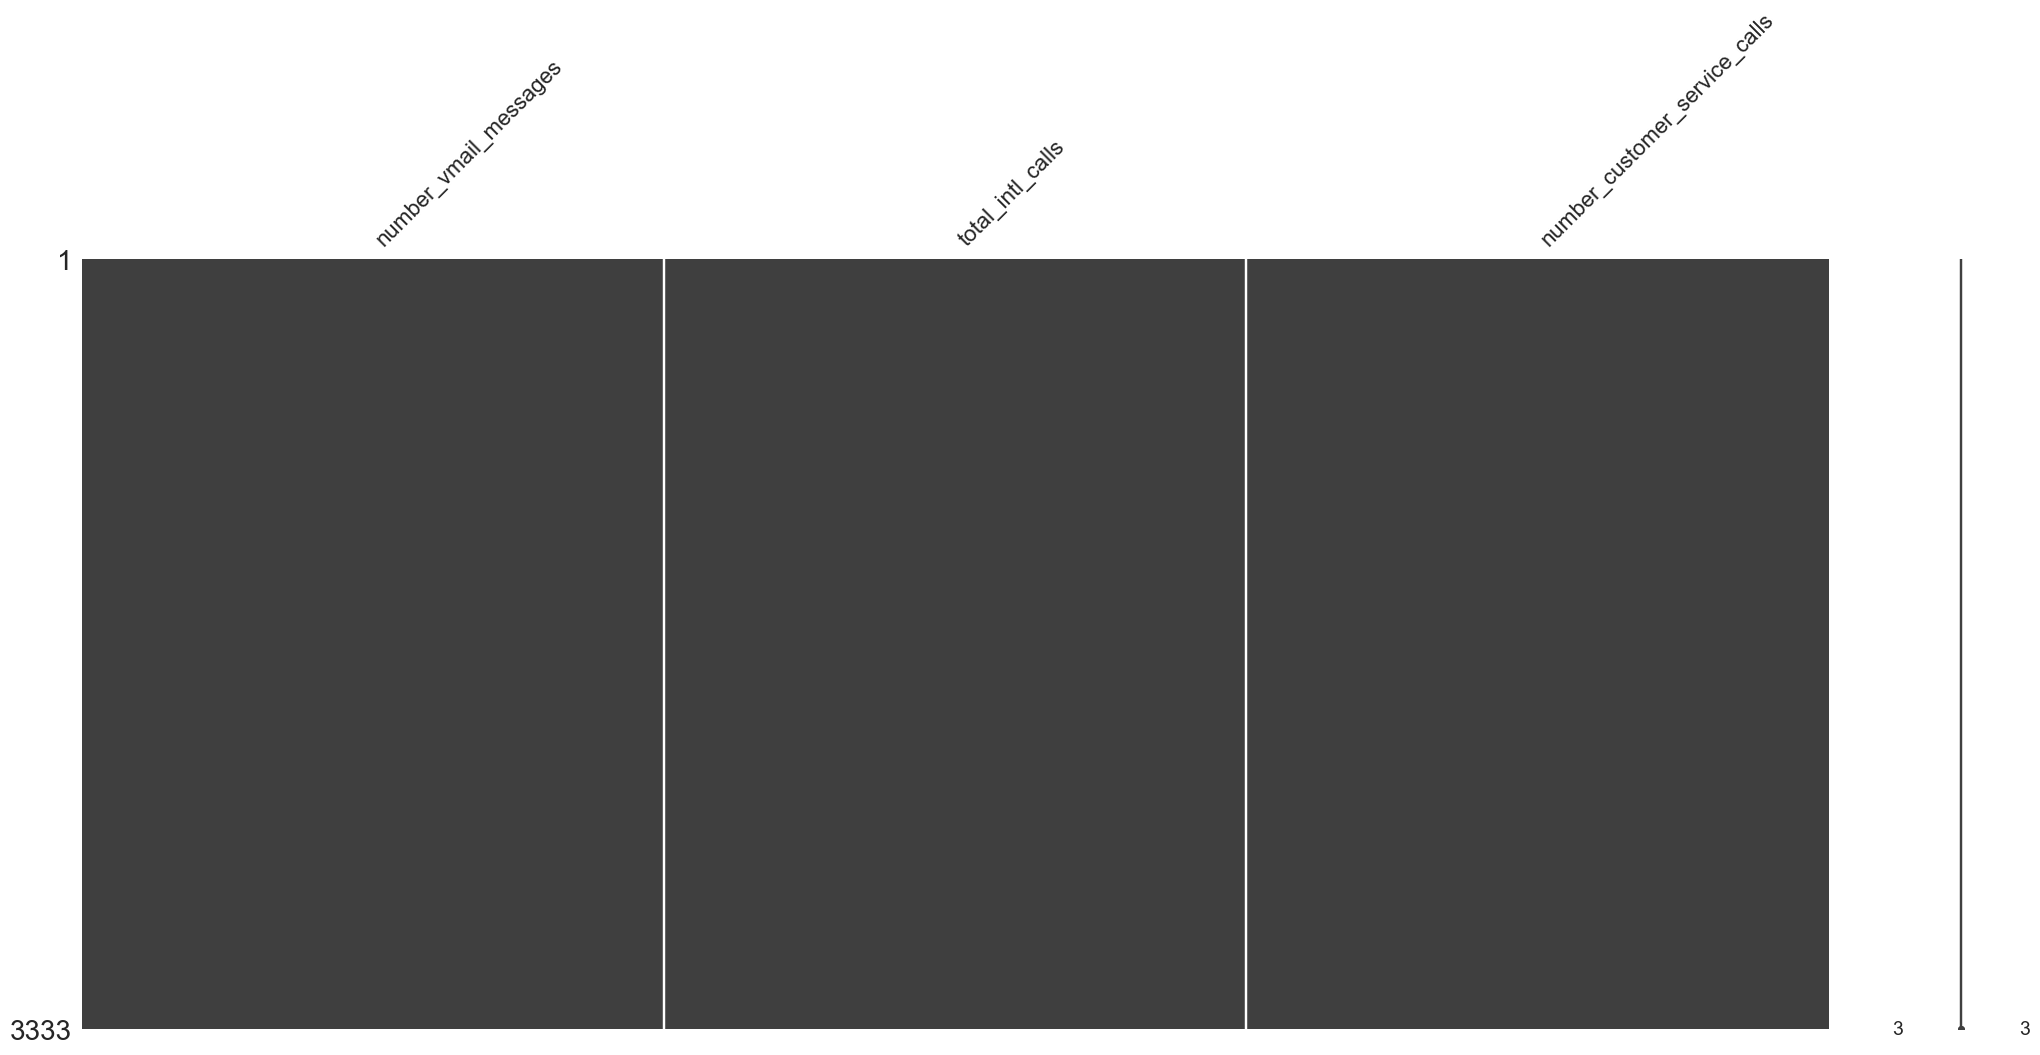

In [28]:
vars_numericas = ['number_vmail_messages', 'total_intl_calls', 'number_customer_service_calls']
vars_numericas_transf = np.log(df[vars_numericas] + 1)
afx.analizar_variables_indpendientes(vars_numericas_transf)

In [29]:
vars_categoricas = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
vars_categoricas_transf = pd.get_dummies(df[vars_categoricas], drop_first=True) 

In [30]:
vector_objetivo = ['churn']
vector_obj_codificado = df[vector_objetivo].replace({'no': 0, 'yes': 1})

In [31]:
df_codificada[vars_numericas] = vars_numericas_transf
df_codificada = pd.concat([df_codificada, vars_categoricas_transf], axis=1)
df_codificada = df_codificada.drop(columns=vars_categoricas)
df_codificada[vector_objetivo] = vector_obj_codificado

# Ejercicio 2

In [36]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

In [35]:
learning_rate = [0.01, 0.1, 0.5]
n_estimators = [50, 100, 500, 1000, 2000]
subsample = [0.1, 0.5, 0.9]

grilla_ada = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators
}

grilla_gradient = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'subsample': subsample
}

modelo_ada = GridSearchCV(AdaBoostClassifier(random_state=1), grilla_ada,
                          cv=5, verbose=5)

modelo_gradient = GridSearchCV(GradientBoostingClassifier(random_state=1), grilla_gradient,
                               cv=5, verbose=5)

In [37]:
X = df_codificada.drop(columns='churn')
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

In [38]:
modelo_ada.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END learning_rate=0.01, n_estimators=50;, score=0.859 total time=   1.1s
[CV 2/5] END learning_rate=0.01, n_estimators=50;, score=0.855 total time=   0.7s
[CV 3/5] END learning_rate=0.01, n_estimators=50;, score=0.857 total time=   0.7s
[CV 4/5] END learning_rate=0.01, n_estimators=50;, score=0.859 total time=   0.6s
[CV 5/5] END learning_rate=0.01, n_estimators=50;, score=0.857 total time=   0.6s
[CV 1/5] END learning_rate=0.01, n_estimators=100;, score=0.859 total time=   1.3s
[CV 2/5] END learning_rate=0.01, n_estimators=100;, score=0.855 total time=   1.4s
[CV 3/5] END learning_rate=0.01, n_estimators=100;, score=0.857 total time=   1.5s
[CV 4/5] END learning_rate=0.01, n_estimators=100;, score=0.859 total time=   1.3s
[CV 5/5] END learning_rate=0.01, n_estimators=100;, score=0.857 total time=   1.3s
[CV 1/5] END learning_rate=0.01, n_estimators=500;, score=0.850 total time=   6.8s
[CV 2/5] END learning_rate=0.01

In [ ]:
print(modelo_ada.best_params_)
print(modelo_ada.best_estimator_)
print(modelo_ada.best_score_)

In [ ]:
modelo_gradient.fit(X_train, y_train)

In [ ]:
print(modelo_gradient.best_params_)
print(modelo_gradient.best_estimator_)
print(modelo_gradient.best_score_)